<a href="https://colab.research.google.com/github/marcosbaccin/Analise_exploratoria/blob/main/Analise_Exploratoria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  <font color='Blue'> Análise Exploratória dos Dados</font>

# Dicionário de Dados

Ex 1
![](https://cienciadosdados.com/images/2022/05/dd.png)

Ex 2
![](https://cienciadosdados.com/images/2022/AD.png)

### Anexo: Dicionário com descrição da Criação das Variáveis
https://bit.ly/3woDQy1


# Conexão com os Dados

In [32]:
# Conexão com os Dados
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicas e Truques de Ciência de Dados/Análise Exploratória/clientes-produtos-invest.csv')
df

,cliente,poupanca,cdb,renda,segmentacao,seguro
0,537044639,"1354,00","16,00","66233,00",40,1
1,876520833,"197,00","7030,00","66838,00",13,1
2,881113910,"50,00","5101,00","68515,00",40,1
3,891866209,"269,00","7475,00","74931,00",40,1
4,810003285,"1371,00","825,00","97359,00",40,0
...,...,...,...,...,...,...
32556,816950489,"195,00","1472,00","90871,00",38,0
32557,806707803,"1310,00","5333,00","13648,00",40,1
32558,730303105,"193,00","7957,00","80355,00",40,0
32559,770056517,"839,00","7287,00","39585,00",20,1


In [33]:
# verificar dimensões do dataset
df.shape

(32561, 6)

In [34]:
# Informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      32561 non-null  int64 
 1   poupanca     32561 non-null  object
 2   cdb          32561 non-null  object
 3   renda        32561 non-null  object
 4   segmentacao  32561 non-null  int64 
 5   seguro       32561 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.5+ MB


In [35]:
df["poupanca"] = df["poupanca"].apply(lambda x: x.replace(",", "."))
df["cdb"] = df["cdb"].apply(lambda x: x.replace(",", "."))
df["renda"] = df["renda"].apply(lambda x: x.replace(",", "."))

df['poupanca'] = df['poupanca'].astype(float)
df['cdb'] = df['cdb'].astype(float)
df['renda'] = df['renda'].astype(float)

df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente      32561 non-null  int64  
 1   poupanca     32561 non-null  float64
 2   cdb          32561 non-null  float64
 3   renda        32561 non-null  float64
 4   segmentacao  32561 non-null  int64  
 5   seguro       32561 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.5 MB


In [36]:
# Verifica valores missing (ausentes , nulos)
df.isnull().sum()

cliente        0
poupanca       0
cdb            0
renda          0
segmentacao    0
seguro         0
dtype: int64

In [8]:
# Verifica valores duplicados
df.duplicated().sum()

0

# Análise Estatística

In [37]:
# Estatística Descritiva das variáveis numéricas do Dataset
df.describe()

,cliente,poupanca,cdb,renda,segmentacao,seguro
count,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,8.002490e+08,755.708455,4996.138294,52429.265563,40.437456,0.669205
std,5.757900e+07,430.594300,2877.553478,27429.370262,12.347429,0.470506
min,5.370446e+08,11.000000,1.000000,5000.000000,1.000000,0.000000
25%,7.506786e+08,383.000000,2509.000000,28468.000000,40.000000,0.000000
50%,8.003224e+08,756.000000,5020.000000,52471.000000,40.000000,1.000000
75%,8.503749e+08,1129.000000,7483.000000,76128.000000,45.000000,1.000000
max,8.999989e+08,1500.000000,10000.000000,99999.000000,99.000000,1.000000


In [38]:
# Frequencia das variáveis categoricas (que possuem ao invés de uma sequencia de números, possuem categorias a, b, c...)
df['seguro'].value_counts()

1    21790
0    10771
Name: seguro, dtype: int64

In [39]:
df['segmentacao'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: segmentacao, Length: 94, dtype: int64

In [40]:
df.head(2)

,cliente,poupanca,cdb,renda,segmentacao,seguro
0,537044639,1354.0,16.0,66233.0,40,1
1,876520833,197.0,7030.0,66838.0,13,1


In [41]:
# Criação de Campos
df['invest_total'] = df['poupanca'] + df['cdb']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
0,537044639,1354.0,16.0,66233.0,40,1,1370.0
1,876520833,197.0,7030.0,66838.0,13,1,7227.0
2,881113910,50.0,5101.0,68515.0,40,1,5151.0
3,891866209,269.0,7475.0,74931.0,40,1,7744.0
4,810003285,1371.0,825.0,97359.0,40,0,2196.0
...,...,...,...,...,...,...,...
32556,816950489,195.0,1472.0,90871.0,38,0,1667.0
32557,806707803,1310.0,5333.0,13648.0,40,1,6643.0
32558,730303105,193.0,7957.0,80355.0,40,0,8150.0
32559,770056517,839.0,7287.0,39585.0,20,1,8126.0


In [42]:
df.corr(method='spearman')

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
cliente,1.000000,0.002218,-0.004745,-0.007649,0.004825,0.003920,-0.004375
poupanca,0.002218,1.000000,-0.004710,0.002926,0.004962,0.009713,0.138329
cdb,-0.004745,-0.004710,1.000000,0.001556,-0.001063,-0.007828,0.989464
renda,-0.007649,0.002926,0.001556,1.000000,0.000423,-0.001012,0.002084
segmentacao,0.004825,0.004962,-0.001063,0.000423,1.000000,0.264941,-0.000234
seguro,0.003920,0.009713,-0.007828,-0.001012,0.264941,1.000000,-0.006310
invest_total,-0.004375,0.138329,0.989464,0.002084,-0.000234,-0.006310,1.000000


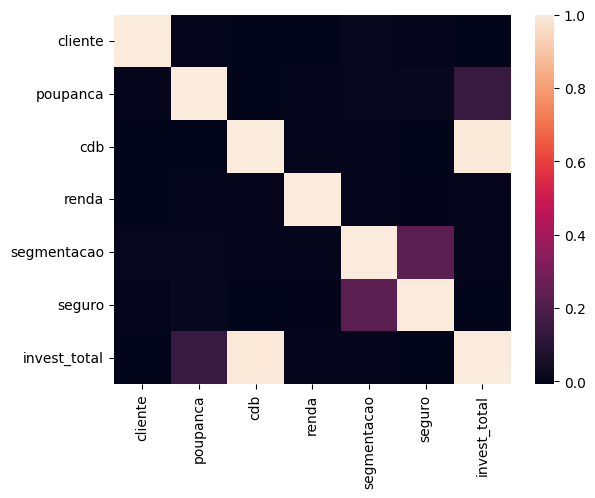

In [43]:
import seaborn as sns
ax = sns.heatmap(df.corr(method='pearson'))

# Criação de Campos para Aprofundar a Análise

In [44]:
# Criação de Campos
df['perc_cdb'] = df['cdb'] / df['invest_total']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
0,537044639,1354.0,16.0,66233.0,40,1,1370.0,0.011679
1,876520833,197.0,7030.0,66838.0,13,1,7227.0,0.972741
2,881113910,50.0,5101.0,68515.0,40,1,5151.0,0.990293
3,891866209,269.0,7475.0,74931.0,40,1,7744.0,0.965263
4,810003285,1371.0,825.0,97359.0,40,0,2196.0,0.375683
...,...,...,...,...,...,...,...,...
32556,816950489,195.0,1472.0,90871.0,38,0,1667.0,0.883023
32557,806707803,1310.0,5333.0,13648.0,40,1,6643.0,0.802800
32558,730303105,193.0,7957.0,80355.0,40,0,8150.0,0.976319
32559,770056517,839.0,7287.0,39585.0,20,1,8126.0,0.896751


# Realização de Filtros

In [45]:
#filtrando registros do dataset com loc
df.loc[df.renda > 99990]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
15543,798331346,1309.0,2954.0,99999.0,50,1,4263.0,0.692939
18224,743239118,393.0,194.0,99991.0,40,1,587.0,0.330494


In [46]:
#filtrando registros do dataset com loc
df.loc[df.perc_cdb > 0.98]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
2,881113910,50.0,5101.0,68515.0,40,1,5151.0,0.990293
12,827746498,13.0,7136.0,61650.0,30,0,7149.0,0.998182
42,899135164,38.0,7665.0,70000.0,50,1,7703.0,0.995067
57,826643282,63.0,6435.0,72614.0,40,1,6498.0,0.990305
58,898964815,36.0,8355.0,39587.0,48,1,8391.0,0.995710
...,...,...,...,...,...,...,...,...
32455,853464422,41.0,5251.0,65672.0,50,1,5292.0,0.992252
32472,754947155,147.0,8697.0,6833.0,55,1,8844.0,0.983379
32518,861316804,77.0,7740.0,32721.0,40,1,7817.0,0.990150
32535,821199055,47.0,8090.0,88328.0,35,1,8137.0,0.994224


In [47]:
df.loc[(df.renda > 90000) & (df.perc_cdb > 0.98)]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
395,821105498,130.0,9682.0,97432.0,40,1,9812.0,0.986751
461,763267262,109.0,9436.0,92312.0,40,1,9545.0,0.988580
544,897144117,11.0,1991.0,93955.0,50,1,2002.0,0.994505
614,751056562,15.0,7607.0,94400.0,20,0,7622.0,0.998032
631,700111004,55.0,7255.0,99625.0,40,0,7310.0,0.992476
...,...,...,...,...,...,...,...,...
32099,880143897,49.0,5766.0,98831.0,10,0,5815.0,0.991574
32139,785099969,49.0,2788.0,91798.0,40,1,2837.0,0.982728
32366,880477266,21.0,3442.0,95878.0,40,0,3463.0,0.993936
32369,854146229,11.0,5708.0,96831.0,50,1,5719.0,0.998077


In [48]:
#iloc: selecionando pela faixa de ´indice de 2 até 10 (10 é exclusivo)
df.iloc[25:50]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
25,706209306,260.0,5860.0,97006.0,40,1,6120.0,0.957516
26,821200090,143.0,757.0,61325.0,40,1,900.0,0.841111
27,866285308,182.0,4053.0,28175.0,60,1,4235.0,0.957025
28,853404116,1229.0,5265.0,16633.0,80,1,6494.0,0.810748
29,756089240,128.0,4741.0,12056.0,40,1,4869.0,0.973711
30,768676735,625.0,4765.0,5005.0,52,1,5390.0,0.884045
31,818224832,1392.0,7727.0,16082.0,44,1,9119.0,0.847352
32,782483479,127.0,5068.0,36414.0,40,1,5195.0,0.975553
33,887062413,1132.0,7766.0,58864.0,40,1,8898.0,0.872780
34,807656210,991.0,8968.0,50490.0,15,1,9959.0,0.900492


# Análise Gráfica
![](https://raw.githubusercontent.com/infinum/flutter-charts/feature/render-object/assets/showcase.gif)

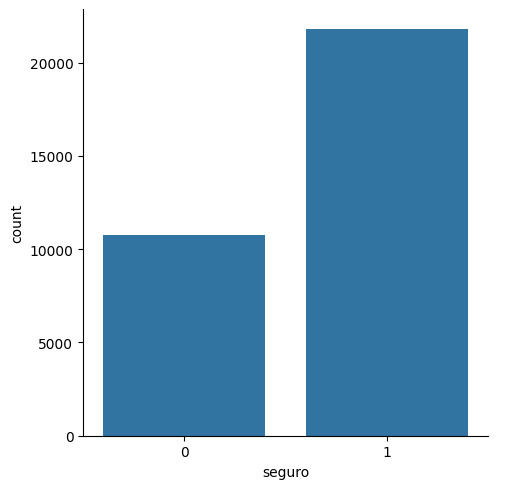

In [49]:
# importar o Sns
import seaborn as sns
# Visualização Gráfica dos dados
sns.catplot(x="seguro", kind="count",  data=df);

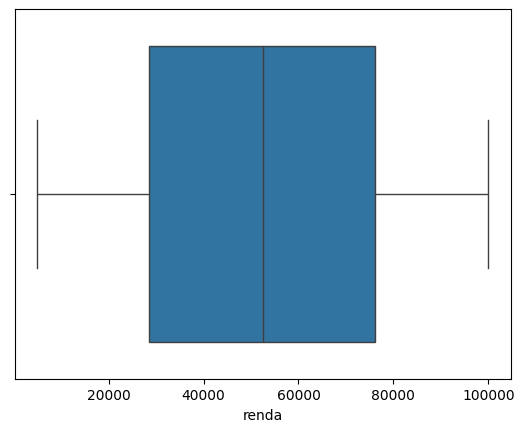

In [50]:
# Visualização Gráfica dos dados
sns.boxplot(x="renda",   data=df);

<ipython-input-51-afe116f635e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.perc_cdb	, kde=True)


<Axes: xlabel='perc_cdb', ylabel='Density'>

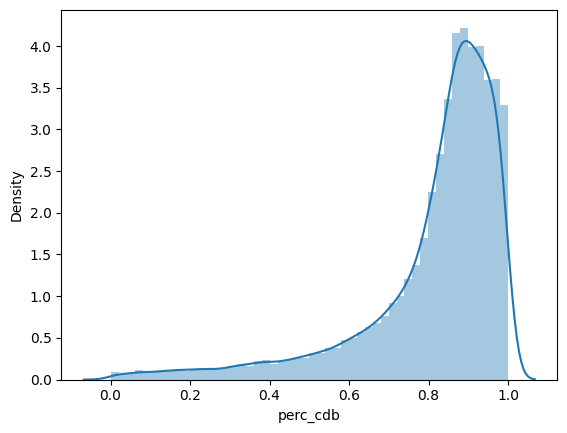

In [51]:
# Visualização Gráfica dos dados
sns.distplot(df.perc_cdb	, kde=True)

## Mão na Massa

In [53]:
import pandas as pd
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicas e Truques de Ciência de Dados/Análise Exploratória/BANK_CUSTOMERS_SAS.csv", delimiter=';')
df2

,Age of Oldest Account,Checking Account,Checking Balance,Checking Deposits,Amount Deposited,Number Cash Back,Number of Checks,Direct Deposit,Number Insufficient Fund,Amount NSF,...,Income,Owns Home,Length of Residence,Home Value,Age,Credit Score,Recent Address Change,Local Address,Branch of Bank,Area Classification
0,2.5,1,56.29,2,955.51,0,1,0,0,0.0,...,41.0,1.0,8.0,106.0,49.0,675.0,0,1,B12,U
1,5.5,1,3292.17,2,961.60,0,1,0,0,0.0,...,95.0,1.0,8.5,129.0,33.0,593.0,1,1,B7,U
2,3.7,1,1723.86,2,2108.65,0,2,0,0,0.0,...,22.0,0.0,3.5,98.0,53.0,742.0,0,1,B5,U
3,4.5,0,0.00,0,0.00,0,0,0,0,0.0,...,25.0,0.0,6.0,103.0,48.0,601.0,0,1,B1,U
4,14.6,1,67.91,2,519.24,0,3,0,0,0.0,...,38.0,0.0,4.5,112.0,68.0,699.0,0,1,B9,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22.1,1,1983.35,2,2576.58,0,9,1,0,0.0,...,15.0,0.0,3.5,102.0,33.0,611.0,0,1,B4,U
9996,3.9,1,404.80,5,1367.94,0,6,1,0,0.0,...,57.0,0.0,4.0,110.0,51.0,660.0,0,1,B4,U
9997,NaN,1,577.22,3,2491.99,0,5,0,0,0.0,...,79.0,0.0,5.5,135.0,52.0,709.0,0,1,B1,U
9998,1.2,1,1610.26,1,1186.74,0,9,0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,714.0,0,1,B18,R


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age of Oldest Account     9402 non-null   float64
 1   Checking Account          10000 non-null  int64  
 2   Checking Balance          10000 non-null  float64
 3   Checking Deposits         10000 non-null  int64  
 4   Amount Deposited          10000 non-null  float64
 5   Number Cash Back          10000 non-null  int64  
 6   Number of Checks          10000 non-null  int64  
 7   Direct Deposit            10000 non-null  int64  
 8   Number Insufficient Fund  10000 non-null  int64  
 9   Amount NSF                10000 non-null  float64
 10  Number Telephone Banking  8710 non-null   float64
 11  Teller Visits             10000 non-null  int64  
 12  Saving Account            10000 non-null  int64  
 13  Saving Balance            10000 non-null  float64
 14  ATM    

In [55]:
df2.describe()

,Age of Oldest Account,Checking Account,Checking Balance,Checking Deposits,Amount Deposited,Number Cash Back,Number of Checks,Direct Deposit,Number Insufficient Fund,Amount NSF,...,Credit Card Purchases,Safety Deposit Box,Income,Owns Home,Length of Residence,Home Value,Age,Credit Score,Recent Address Change,Local Address
count,9402.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8710.000000,10000.000000,8172.000000,8261.000000,8172.000000,8172.000000,7994.000000,9788.000000,10000.000000,10000.000000
mean,5.920145,0.821200,2196.746170,2.158100,2266.210877,0.015800,4.330000,0.293800,0.085200,2.283055,...,0.148220,0.104700,40.194444,0.548360,7.038669,110.790382,47.901301,666.274009,0.029800,0.961200
std,6.530453,0.383204,7477.245094,1.731359,5536.686525,0.127875,5.241359,0.455524,0.279193,14.584850,...,0.443844,0.306182,28.424480,0.497686,2.838120,22.015548,14.040232,40.117225,0.170044,0.193128
min,0.300000,0.000000,-109.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,16.000000,509.000000,0.000000,0.000000
25%,1.900000,1.000000,68.515000,1.000000,181.940000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,20.000000,0.000000,4.875000,98.000000,38.000000,639.000000,0.000000,1.000000
50%,3.900000,1.000000,570.925000,2.000000,1127.005000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,34.000000,1.000000,7.000000,107.000000,48.000000,666.000000,0.000000,1.000000
75%,6.800000,1.000000,1855.805000,3.000000,2457.010000,0.000000,7.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,54.000000,1.000000,9.000000,120.000000,57.000000,693.000000,0.000000,1.000000
max,61.500000,1.000000,259734.260000,28.000000,229528.590000,2.000000,49.000000,1.000000,1.000000,666.850000,...,4.000000,1.000000,206.000000,1.000000,19.500000,625.000000,94.000000,813.000000,1.000000,1.000000
